In [95]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import r_regression, f_classif, SelectKBest
from scipy.stats import pearsonr
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn import tree
from sklearn.metrics import classification_report

In [96]:
train_data = pd.read_csv("train.tsv", sep='\t')
test_data = pd.read_csv("test.tsv", sep='\t')

In [97]:
train_data.head()

,Number_of_Shops_Around_ATM,ATM_Zone,No_of_Other_ATMs_in_1_KM_radius,Estimated_Number_of_Houses_in_1_KM_Radius,ATM_Placement,ATM_TYPE,ATM_Location_TYPE,ATM_looks,ATM_Attached_to,Average_Wait_Time,Day_Type,rating,revenue
0,66,RL,65,8450,Facing Road,Urban,Only WIthdraw,Normal,Building,3,Working,4,209500
1,26,RL,80,9600,Facing Road,Urban,Only WIthdraw,Normal,Building,3,Working,3,184300
2,65,RL,68,11250,Facing Road,Town,Only WIthdraw,Normal,Building,3,Working,4,231500
3,80,RL,60,9550,Facing Road,Town,Only WIthdraw,Normal,Building,3,Working,4,143600
4,66,RL,84,14260,Facing Road,Town,Only WIthdraw,Normal,Building,4,Working,4,255600


In [98]:
test_data.head()

,Number_of_Shops_Around_ATM,ATM_Zone,No_of_Other_ATMs_in_1_KM_radius,Estimated_Number_of_Houses_in_1_KM_Radius,ATM_Placement,ATM_TYPE,ATM_Location_TYPE,ATM_looks,ATM_Attached_to,Average_Wait_Time,Day_Type,rating,revenue
0,81,RL,101,9150,Facing Road,Town,Only WIthdraw,Normal,Building,3,Working,3,172600
1,30,RL,78,7800,Facing Road,Urban,Only WIthdraw,Normal,Building,2,Working,3,133100
2,24,RL,87,9830,Facing Road,Town,Only WIthdraw,Normal,Building,3,Working,4,171700
3,66,RL,51,8121,Facing Road,Town,Only WIthdraw,Normal,Building,3,Working,3,176700
4,57,RL,80,17120,Facing Road,Urban,Only WIthdraw,Normal,Building,4,Working,3,138332


In [99]:
train_data["ATM_Zone"].unique()

array(['RL', 'RM', 'C', 'FV', 'RH'], dtype=object)

In [100]:
train_data["Day_Type"].unique()

array(['Working', 'Festival', 'Strike', 'National Holiday'], dtype=object)

In [101]:
train_data["ATM_looks"].unique()

array(['Normal', 'New', 'Old and Dull'], dtype=object)

In [102]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150211 entries, 0 to 150210
Data columns (total 13 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   Number_of_Shops_Around_ATM                 150211 non-null  int64 
 1   ATM_Zone                                   150211 non-null  object
 2   No_of_Other_ATMs_in_1_KM_radius            150211 non-null  int64 
 3   Estimated_Number_of_Houses_in_1_KM_Radius  150211 non-null  int64 
 4   ATM_Placement                              150211 non-null  object
 5   ATM_TYPE                                   150211 non-null  object
 6   ATM_Location_TYPE                          150211 non-null  object
 7   ATM_looks                                  150211 non-null  object
 8   ATM_Attached_to                            150211 non-null  object
 9   Average_Wait_Time                          150211 non-null  int64 
 10  Day_Type            

In [103]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Number_of_Shops_Around_ATM                 2836 non-null   int64 
 1   ATM_Zone                                   2836 non-null   object
 2   No_of_Other_ATMs_in_1_KM_radius            2836 non-null   int64 
 3   Estimated_Number_of_Houses_in_1_KM_Radius  2836 non-null   int64 
 4   ATM_Placement                              2836 non-null   object
 5   ATM_TYPE                                   2836 non-null   object
 6   ATM_Location_TYPE                          2836 non-null   object
 7   ATM_looks                                  2836 non-null   object
 8   ATM_Attached_to                            2836 non-null   object
 9   Average_Wait_Time                          2836 non-null   int64 
 10  Day_Type                            

In [104]:
one_hot_df = pd.get_dummies(train_data, columns=['ATM_Zone', 'ATM_Placement','ATM_TYPE','ATM_Location_TYPE','ATM_looks','ATM_Attached_to','Day_Type'])
one_hot_cols = one_hot_df.columns.tolist()

In [105]:
for col in one_hot_df.columns:
    model = IsolationForest(contamination=0.05)
    model.fit(one_hot_df[col].values.reshape(-1, 1))
    one_hot_df[col+'_anomaly'] = pd.Series(model.predict(one_hot_df[col].values.reshape(-1, 1)))
anomaly_cols = [col for col in one_hot_df.columns if '_anomaly' in col]
anomaly_df = one_hot_df[anomaly_cols].replace({-1: 1, 1: 0})
anomaly_df['total_anomaly'] = anomaly_df.sum(axis=1)
drop_cols = anomaly_df[anomaly_df['total_anomaly'] > 0].index.tolist()
train_df_without_outliers = one_hot_df.drop(drop_cols, axis=0)

In [106]:
train_df_without_outliers = train_df_without_outliers[one_hot_cols]
train_df_without_outliers.head()

,Number_of_Shops_Around_ATM,No_of_Other_ATMs_in_1_KM_radius,Estimated_Number_of_Houses_in_1_KM_Radius,Average_Wait_Time,rating,revenue,ATM_Zone_C,ATM_Zone_FV,ATM_Zone_RH,ATM_Zone_RL,...,ATM_Attached_to_Building,ATM_Attached_to_Flat,ATM_Attached_to_House,ATM_Attached_to_Petrol Bunk,ATM_Attached_to_Shed,ATM_Attached_to_Shop,Day_Type_Festival,Day_Type_National Holiday,Day_Type_Strike,Day_Type_Working
0,66,65,8450,3,4,209500,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,26,80,9600,3,3,184300,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,65,68,11250,3,4,231500,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,80,60,9550,3,4,143600,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,66,84,14260,4,4,255600,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [107]:
Y_reg = train_df_without_outliers['revenue']
Y_cla = train_df_without_outliers['rating']
X = train_df_without_outliers.drop(['revenue', 'rating'], axis=1)
selector1 = SelectKBest(f_regression, k=16)
selector1.fit(X, Y_reg)

top_features1 = X.columns[selector1.get_support()].tolist()
X_reg = X[top_features1]
selector2 = SelectKBest(f_classif, k=12)
selector2.fit(X, Y_cla)
top_features2 = X.columns[selector2.get_support()].tolist()
X_cla = X[top_features2]
print(top_features1)
print(top_features2)
# X_cla = X
# X_reg = X

['Number_of_Shops_Around_ATM', 'No_of_Other_ATMs_in_1_KM_radius', 'Estimated_Number_of_Houses_in_1_KM_Radius', 'Average_Wait_Time', 'ATM_Zone_RL', 'ATM_Zone_RM', 'ATM_TYPE_Town', 'ATM_TYPE_Urban', 'ATM_Attached_to_Building', 'ATM_Attached_to_Petrol Bunk', 'ATM_Attached_to_Shed', 'ATM_Attached_to_Shop', 'Day_Type_Festival', 'Day_Type_National Holiday', 'Day_Type_Strike', 'Day_Type_Working']
['Number_of_Shops_Around_ATM', 'No_of_Other_ATMs_in_1_KM_radius', 'Estimated_Number_of_Houses_in_1_KM_Radius', 'Average_Wait_Time', 'ATM_Zone_RL', 'ATM_Zone_RM', 'ATM_TYPE_Town', 'ATM_TYPE_Urban', 'ATM_Attached_to_Building', 'ATM_Attached_to_Petrol Bunk', 'Day_Type_Strike', 'Day_Type_Working']


D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 4  5  6  9 10 11 12 15 16 17 18 19 20 21 23 24 26 27 28 29 30 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f 

In [142]:
scaler1 = StandardScaler().fit(X_reg)
scaled_X_reg = scaler1.transform(X_reg)
# scaler2 = StandardScaler().fit(X_cla)
# scaled_X_cla = scaler2.transform(X_cla)
Y_reg = np.log(Y_reg)
# Y_cla = np.log(Y_cla)
# Y_reg = Y_reg - Y_reg.mean()
# Y_cla = Y_cla - Y_cla.mean()
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(scaled_X_reg, Y_reg, test_size=0.2)
X_train_cla, X_test_cla, Y_train_cla, Y_test_cla = train_test_split(X_cla, Y_cla, test_size=0.2)

In [143]:
# model = AdaBoostRegressor(LinearRegression(),n_estimators = 1000)
model = GradientBoostingRegressor(n_estimators = 1000,max_depth=7)
# model = SGDRegressor(loss='squared_error')
model.fit(X_train_reg, Y_train_reg)
pre = model.predict(X_test_reg)
pearsonr(Y_test_reg,pre)[0]

0.9915931738489603

In [145]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
model2 = clf.fit(X_train_cla,Y_train_cla)
Y_pred = model2.predict( X_test_cla)
classification_report(Y_test_cla,Y_pred, output_dict = True)

{'3': {'precision': 0.9802847754654983,
  'recall': 0.9791148682247638,
  'f1-score': 0.9796994725843368,
  'support': 10055},
 '4': {'precision': 0.9760492965934193,
  'recall': 0.9771854266092422,
  'f1-score': 0.9766170311772918,
  'support': 8591},
 '5': {'precision': 0.9961464354527938,
  'recall': 0.9980694980694981,
  'f1-score': 0.9971070395371262,
  'support': 1036},
 'accuracy': 0.9792703993496595,
 'macro avg': {'precision': 0.9841601691705705,
  'recall': 0.9847899309678346,
  'f1-score': 0.9844745144329182,
  'support': 19682},
 'weighted avg': {'precision': 0.9792709395116728,
  'recall': 0.9792703993496595,
  'f1-score': 0.9792702979697229,
  'support': 19682}}

Text(0.5, 0, 'n_estimators')

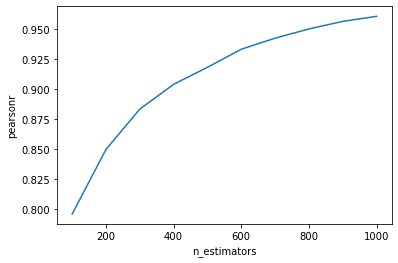

In [89]:
a = np.arange(100, 1100, step=100)
b = []

for i in a:
    model = GradientBoostingRegressor(n_estimators =i)
    model.fit(X_train_reg, Y_train_reg)
    pre = model.predict(X_test_reg)
    b.append(pearsonr(Y_test_reg,pre)[0])

plt.plot(a,b)
plt.ylabel('pearsonr')
plt.xlabel('n_estimators')   

Text(0.5, 0, 'max_depth')

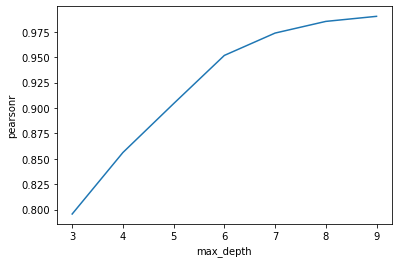

In [90]:
c = np.arange(3, 10)
d = []
for i in c:
    model = GradientBoostingRegressor(max_depth=i)
    model.fit(X_train_reg, Y_train_reg)
    pre = model.predict(X_test_reg)
    d.append(pearsonr(Y_test_reg,pre)[0])
plt.plot(c,d)
plt.ylabel('pearsonr')
plt.xlabel('max_depth')

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Text(0.5, 0, 'max_depth')

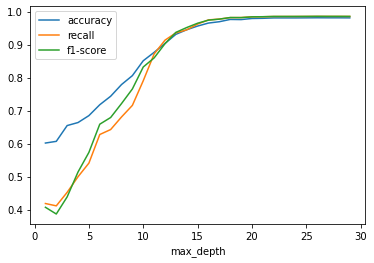

In [118]:
a = np.arange(1, 30)
b = []
c = []
d = []

for i in a:
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i)
    model2 = clf.fit(X_train_cla,Y_train_cla)
    Y_pred = model2.predict(X_test_cla)
    report = classification_report(Y_test_cla,Y_pred, output_dict = True)
    b.append(report['accuracy'])
    c.append(report['macro avg']['recall'])
    d.append(report['macro avg']['f1-score'])

plt.plot(a, b, label='accuracy')
plt.plot(a, c, label='recall')
plt.plot(a, d, label='f1-score')
plt.legend()
plt.xlabel('max_depth')

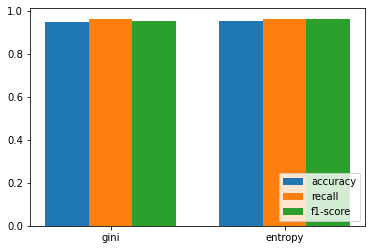

In [124]:
a = ['gini','entropy']
y1 = []
y2 = []
y3 = []

for i in a:
    clf = tree.DecisionTreeClassifier(criterion=i,max_depth=15)
    model2 = clf.fit(X_train_cla,Y_train_cla)
    Y_pred = model2.predict(X_test_cla)
    report = classification_report(Y_test_cla,Y_pred, output_dict = True)
    y1.append(report['accuracy'])
    y2.append(report['macro avg']['recall'])
    y3.append(report['macro avg']['f1-score'])
bar_width = 0.25
bar_positions1 = np.arange(len(a))
bar_positions2 = bar_positions1 + bar_width
bar_positions3 = bar_positions2 + bar_width
plt.bar(bar_positions1, y1, width=bar_width, label='accuracy')
plt.bar(bar_positions2, y2, width=bar_width, label='recall')
plt.bar(bar_positions3, y3, width=bar_width, label='f1-score')
plt.xticks(bar_positions2, a)
plt.legend(loc='lower right')

In [144]:
test_df = pd.get_dummies(test_data, columns=['ATM_Zone', 'ATM_Placement','ATM_TYPE','ATM_Location_TYPE','ATM_looks','ATM_Attached_to','Day_Type'])
test_Y_reg = test_df['revenue']
test_Y_cla = test_df['rating']
test_X = test_df.drop(['revenue', 'rating'], axis=1)
test_X_reg = test_X[top_features1]
test_X_cla = test_X[top_features2]
scaler_test_X_reg = scaler1.transform(test_X_reg)
pre = model.predict(scaler_test_X_reg)
test_Y_reg = np.log(test_Y_reg)
pearsonr(test_Y_reg,pre)[0]

0.7920010652864968

In [146]:
Y_pred = model2.predict(test_X_cla)
report = classification_report(test_Y_cla,Y_pred, output_dict = True)
print(report['accuracy'])
print(report['macro avg']['recall'])
print(report['macro avg']['f1-score'])

0.8039492242595204
0.5666141335276467
0.5689991650775964


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
